In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [13]:
df=pd.read_csv("Salary Data.csv")
print(df)
df.head()




      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [14]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [15]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [16]:
df["Age"].fillna(df["Age"].mean())
df["Years of Experience"].fillna(df["Years of Experience"].mean())
df["Gender"].fillna(df["Gender"].mode()[0])
df["Education Level"].fillna(df["Education Level"].mode()[0])
df["Job Title"].fillna(df["Job Title"].mode()[0])
df=df.dropna(subset=["Salary"])

In [17]:
df.isnull().sum()


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [18]:
df.notnull().sum()

Age                    373
Gender                 373
Education Level        373
Job Title              373
Years of Experience    373
Salary                 373
dtype: int64

In [19]:

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Education Level'] = le.fit_transform(df['Education Level'])
df['Job Title'] = le.fit_transform(df['Job Title'])


In [18]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,1,Software Engineer,5.0,90000.0
1,28.0,Female,2,Data Analyst,3.0,65000.0
2,45.0,Male,3,Senior Manager,15.0,150000.0
3,36.0,Female,1,Sales Associate,7.0,60000.0
4,52.0,Male,2,Director,20.0,200000.0


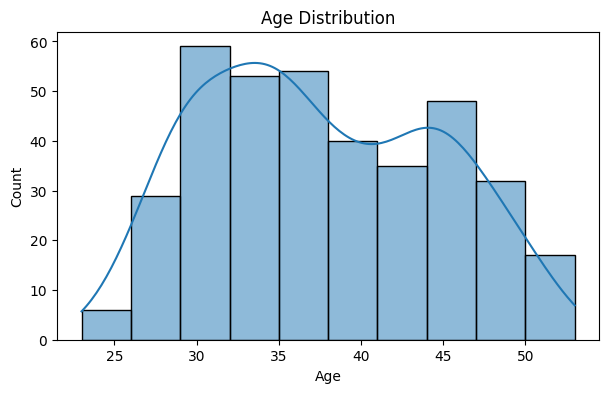

In [20]:
plt.figure(figsize=(7,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


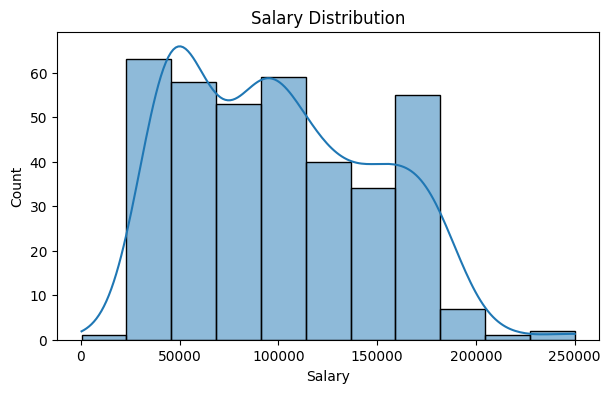

In [21]:
plt.figure(figsize=(7,4))
sns.histplot(df['Salary'], kde=True)
plt.title("Salary Distribution")
plt.show()

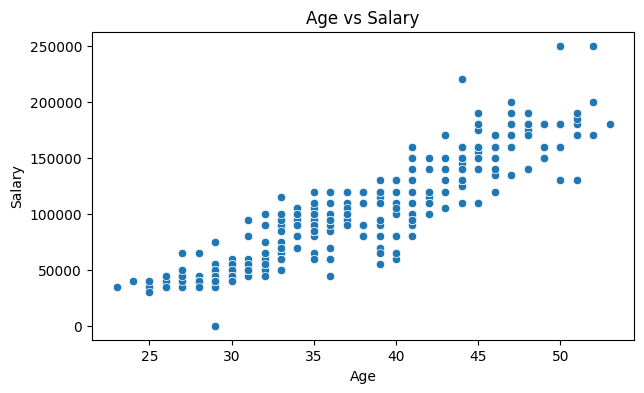

In [23]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title("Age vs Salary")
plt.show()

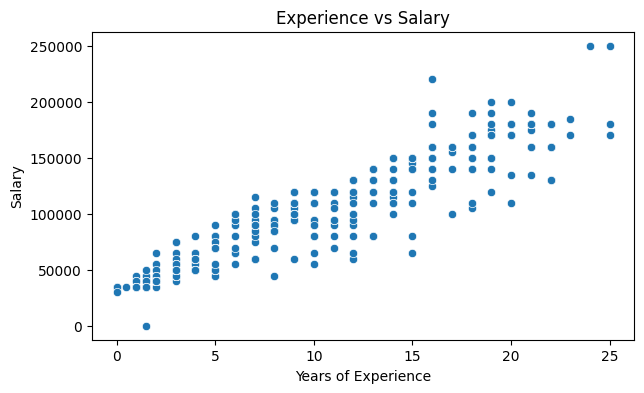

In [24]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title("Experience vs Salary")
plt.show()


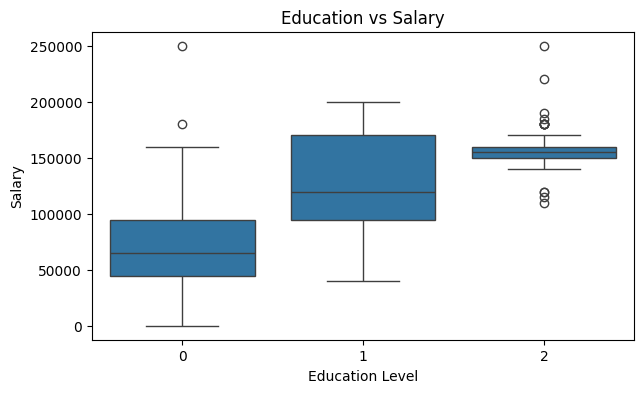

In [26]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title("Education vs Salary")
plt.show()

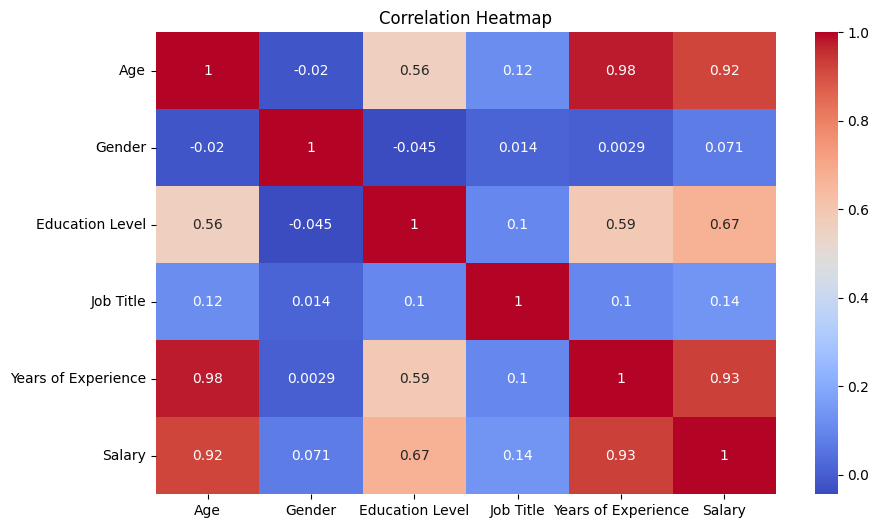

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

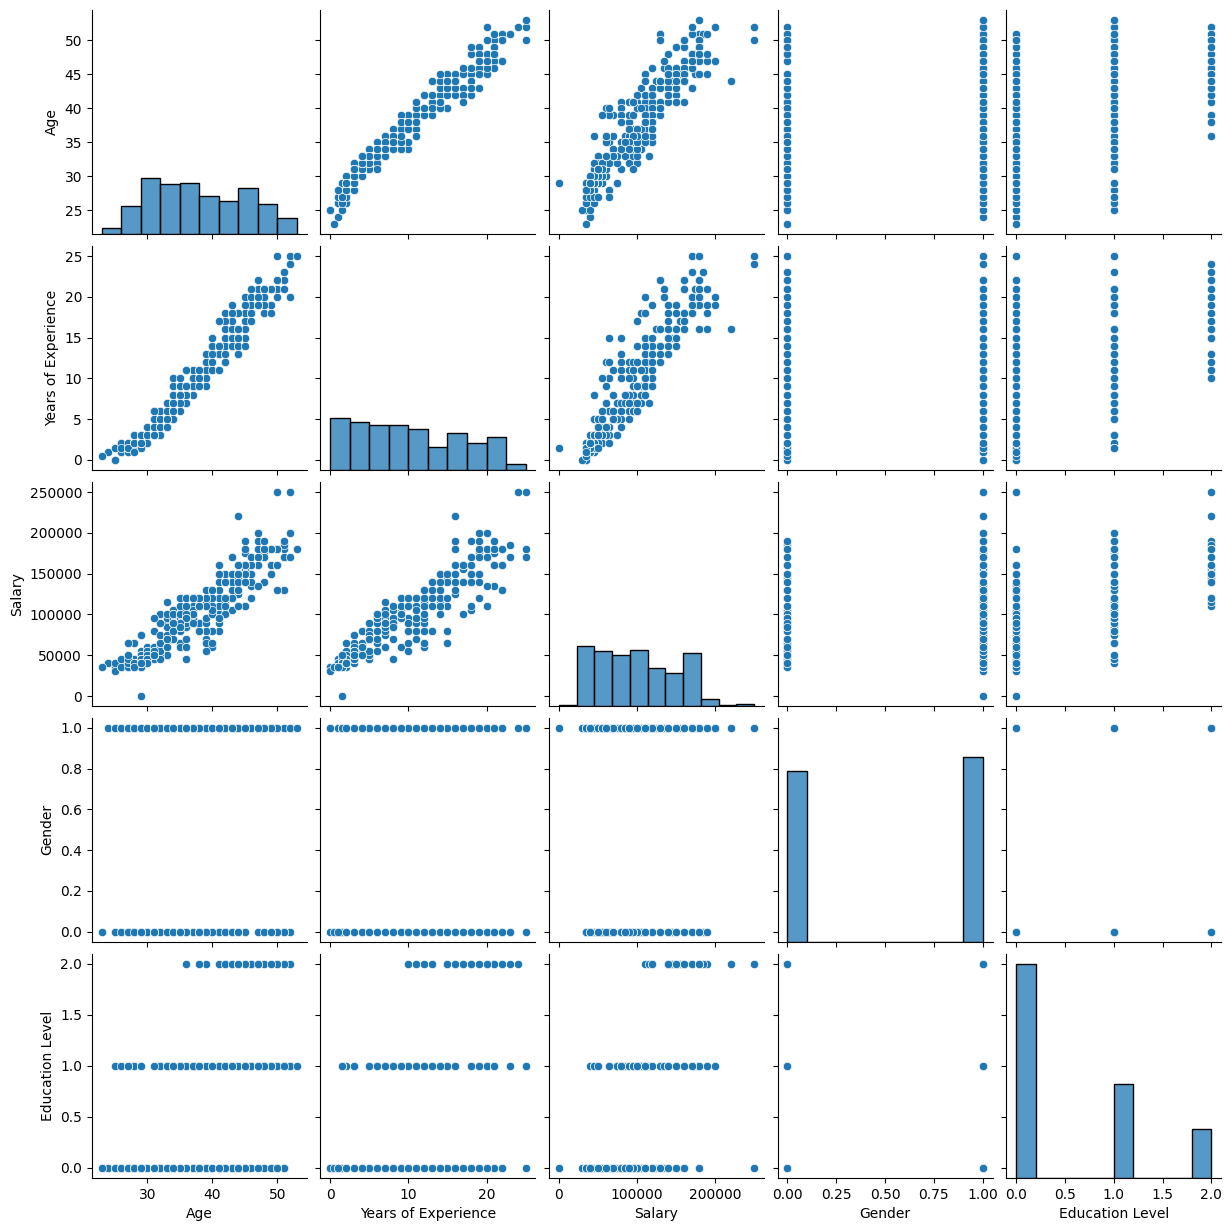

In [31]:
sns.pairplot(df[['Age','Years of Experience','Salary','Gender','Education Level']])
plt.show()


In [33]:
X = df[['Age','Gender','Education Level','Years of Experience']]
y = df['Salary']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
y_pred = model.predict(X_test)

In [38]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))


MAE : 10613.910121260109
MSE : 232595028.5296489
RMSE: 15251.06647187825
R²  : 0.9029876738433329


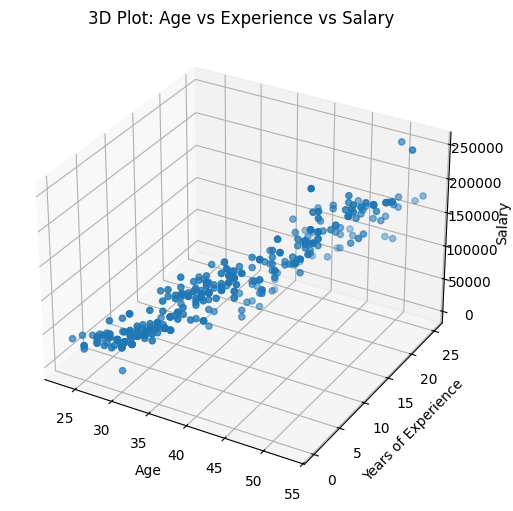

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Years of Experience'], df['Salary'])

ax.set_xlabel("Age")
ax.set_ylabel("Years of Experience")
ax.set_zlabel("Salary")
ax.set_title("3D Plot: Age vs Experience vs Salary")

plt.show()


In [40]:
pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Age,24616.094533
Gender,3802.940602
Education Level,10728.963626
Years of Experience,13648.159540
